In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min


#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_excel('infoclientebanca.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47871 entries, 0 to 47870
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CLIENTE                                  47871 non-null  int64  
 1   grupo_de_cliente                         47871 non-null  object 
 2   Numero_de_transacciones                  47871 non-null  int64  
 3   promedio_por_transaccion                 47871 non-null  float64
 4   transaccion_minima                       47871 non-null  float64
 5   transaccion_maxima                       47871 non-null  float64
 6   desviacion_estandar_por_transaccion      47871 non-null  float64
 7   porcentaje_visa_nacional                 47871 non-null  float64
 8   porcentaje_visa_internacional            47871 non-null  float64
 9   porcentaje_mastercard_nacional           47871 non-null  float64
 10  porcentaje_mastercard_internacional      47871

In [4]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>,
        <AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_manana'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde'}>,
        <AxesSubplot:title={'cente

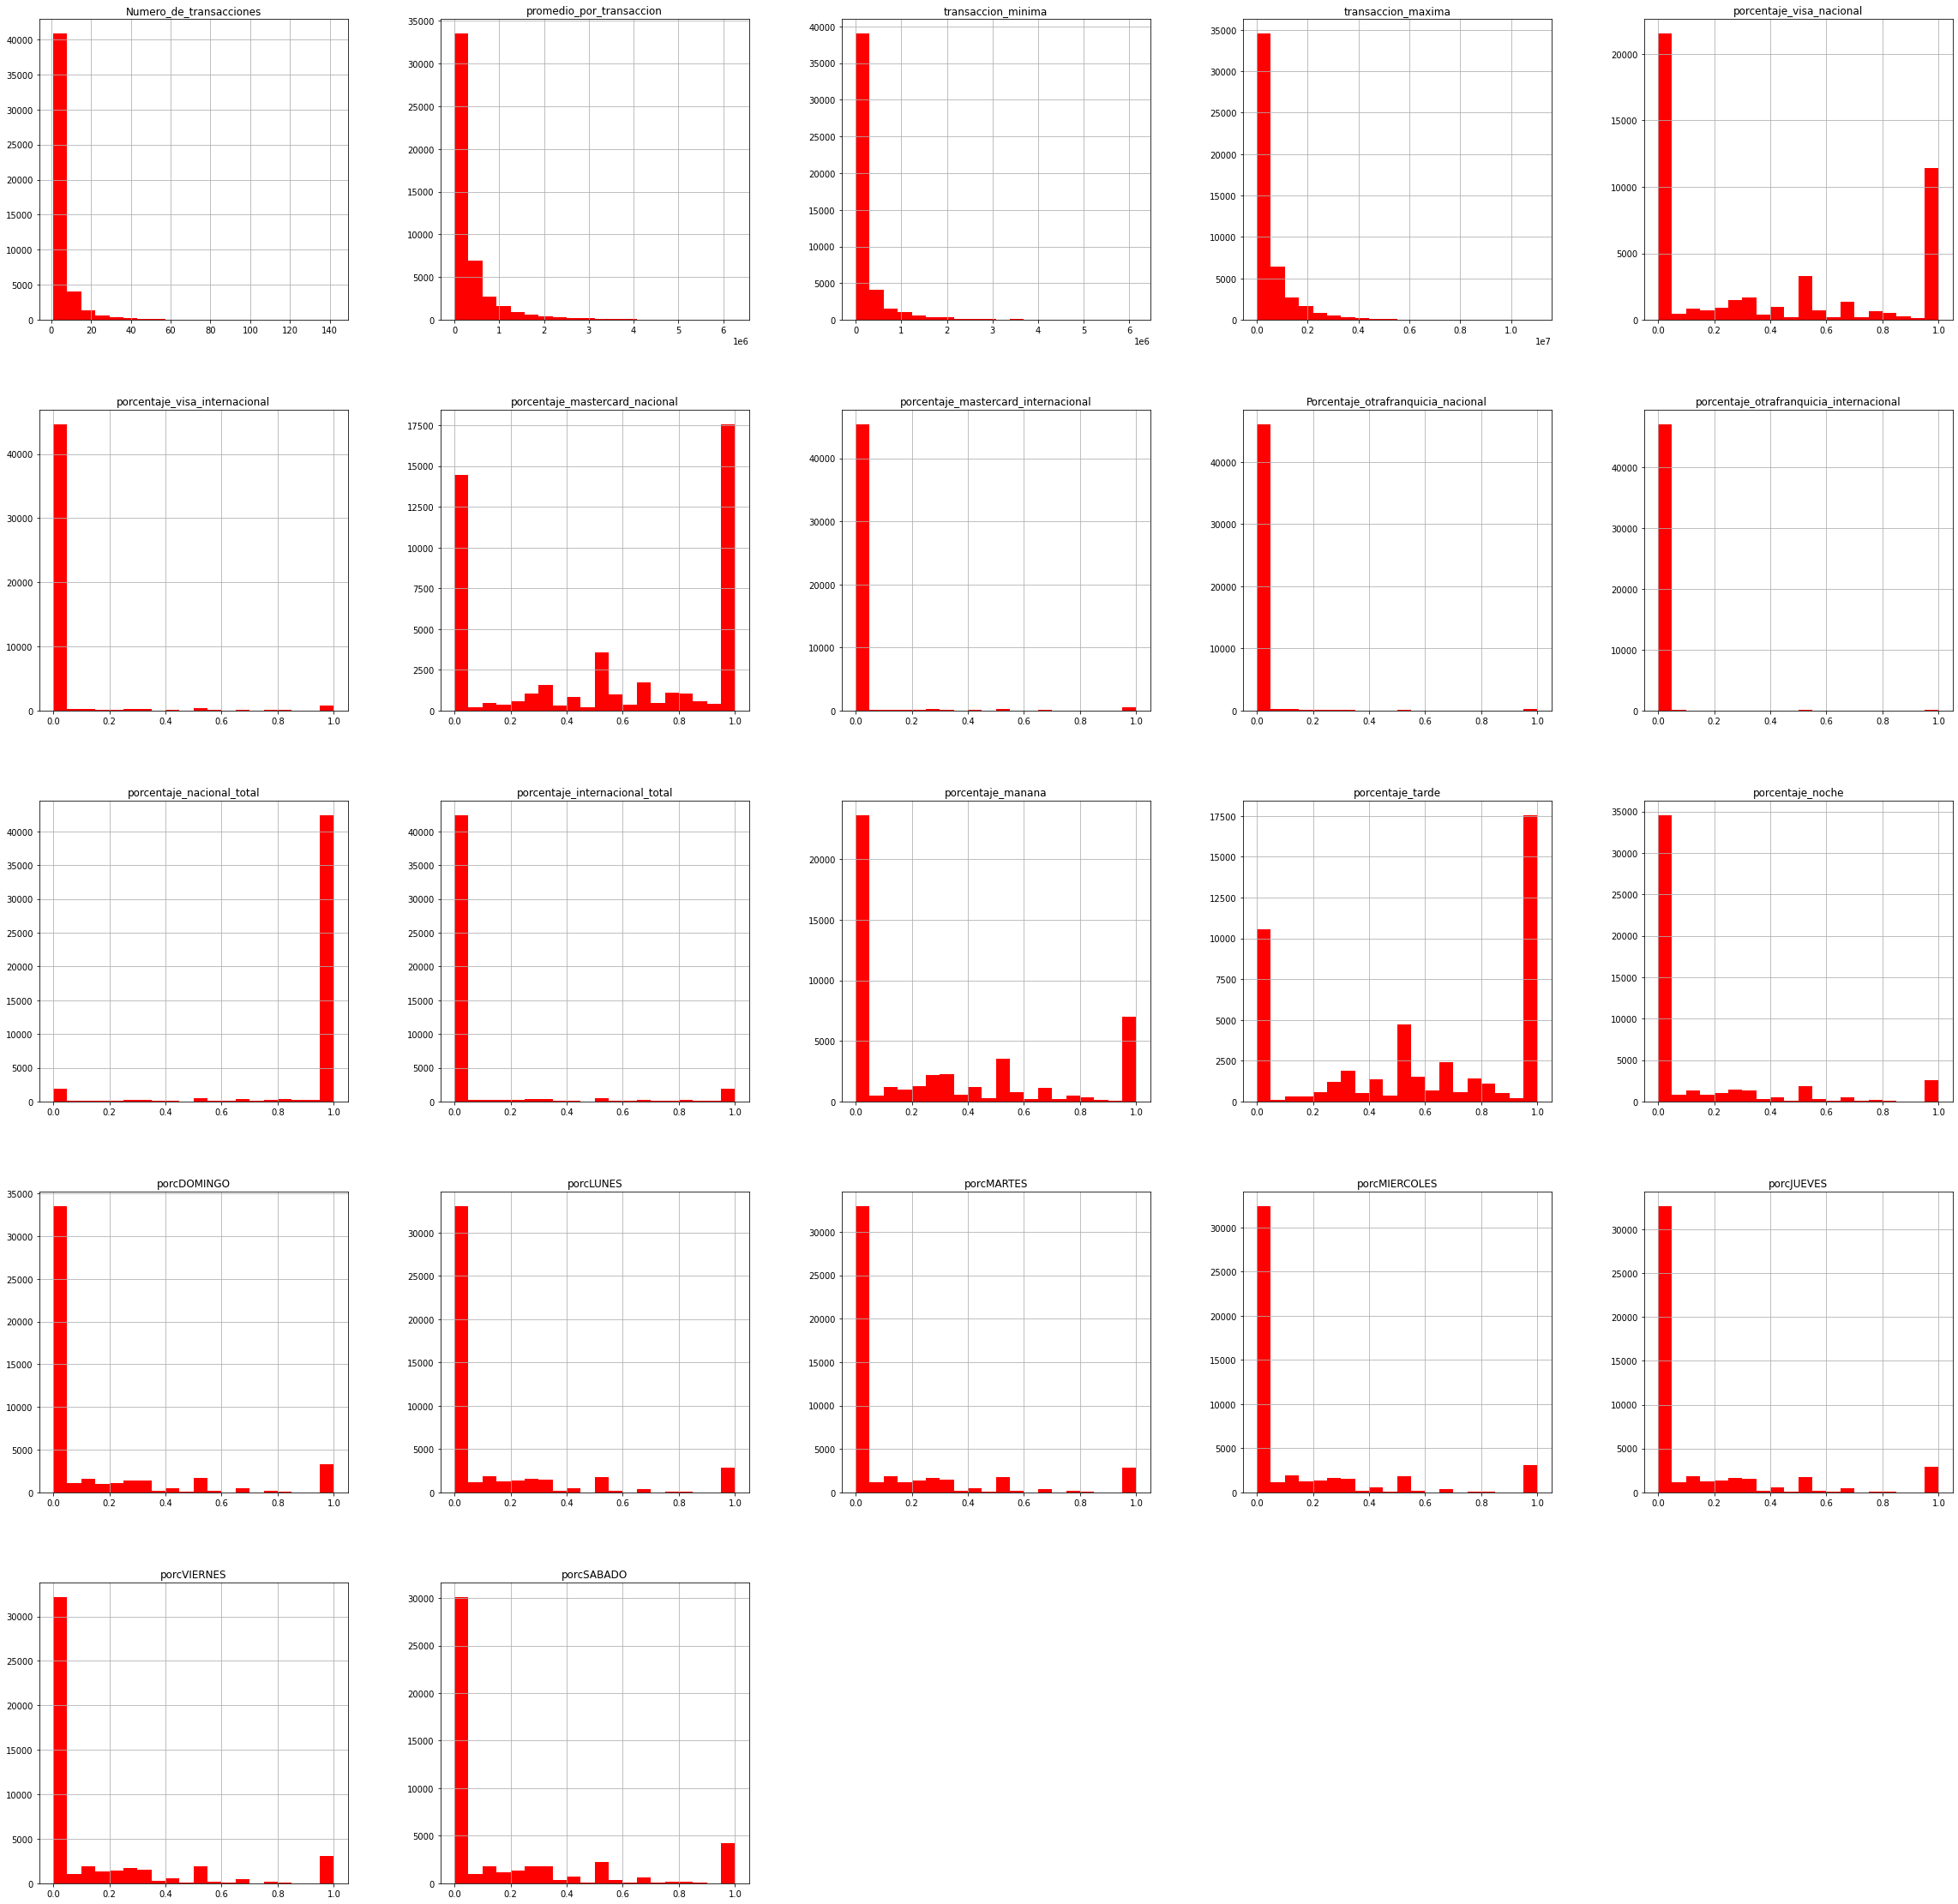

In [5]:
df[[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']].hist(bins = 20, figsize=(40,40), color = 'r')

In [7]:
df['Numero_de_transacciones_ln'] = np.log1p(df['Numero_de_transacciones'])
df['promedio_por_transaccion_ln'] = np.log1p(df['promedio_por_transaccion'])
df['transaccion_minima_ln'] = np.log1p(df['transaccion_minima'])
df['transaccion_maxima_ln'] = np.log1p(df['transaccion_maxima'])


In [8]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>,
        <AxesSubplot:title={'center':'porcentaje_visa_nacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_visa_internacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_mastercard_internacional'}>,
        <AxesSubplot:title={'center':'Porcentaje_otrafranquicia_nacional'}>,
        <AxesSubplot:title={'center':'porcentaje_otrafranquicia_internacional'}>],
       [<AxesSubplot:title={'center':'porcentaje_nacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_internacional_total'}>,
        <AxesSubplot:title={'center':'porcentaje_manana'}>,
        <AxesSubplot:title={'center':'porcentaje_tarde'}>,
        <AxesSubplot:title={'cente

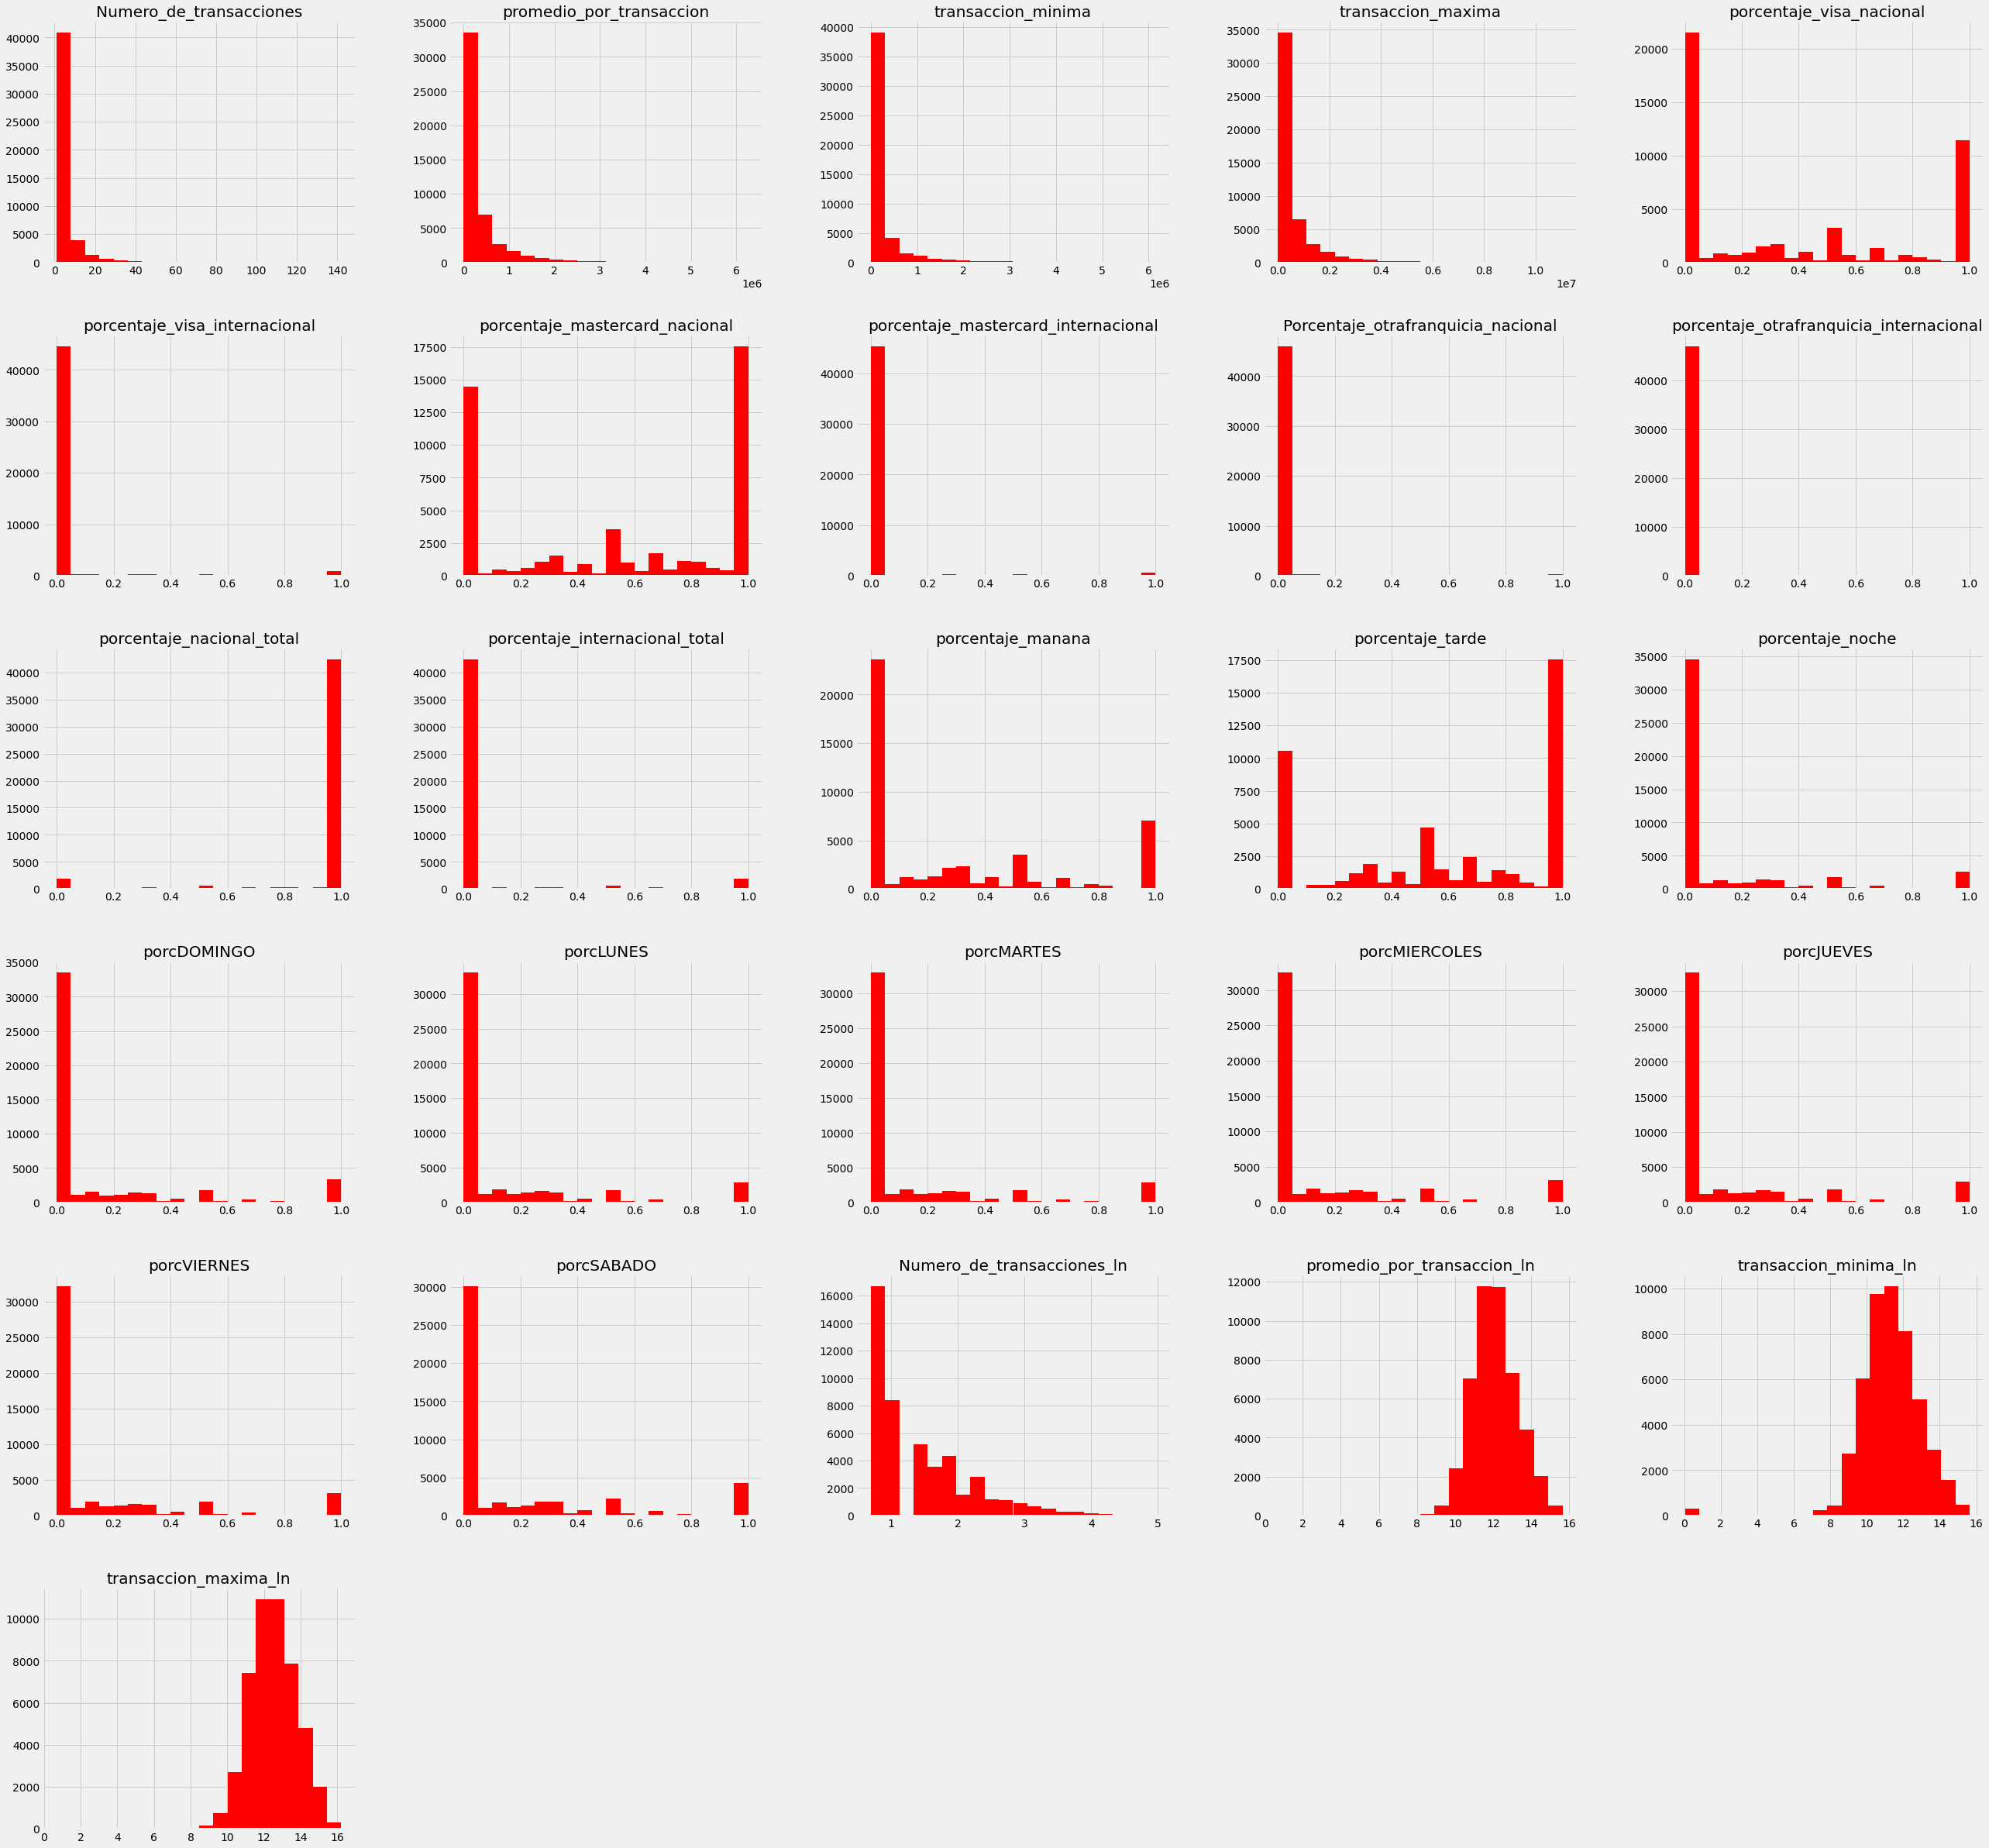

In [62]:
df[[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln']].hist(bins = 20, figsize=(40,40), color = 'r')

In [6]:
corr_df = df.corr(method='pearson')


<AxesSubplot:>

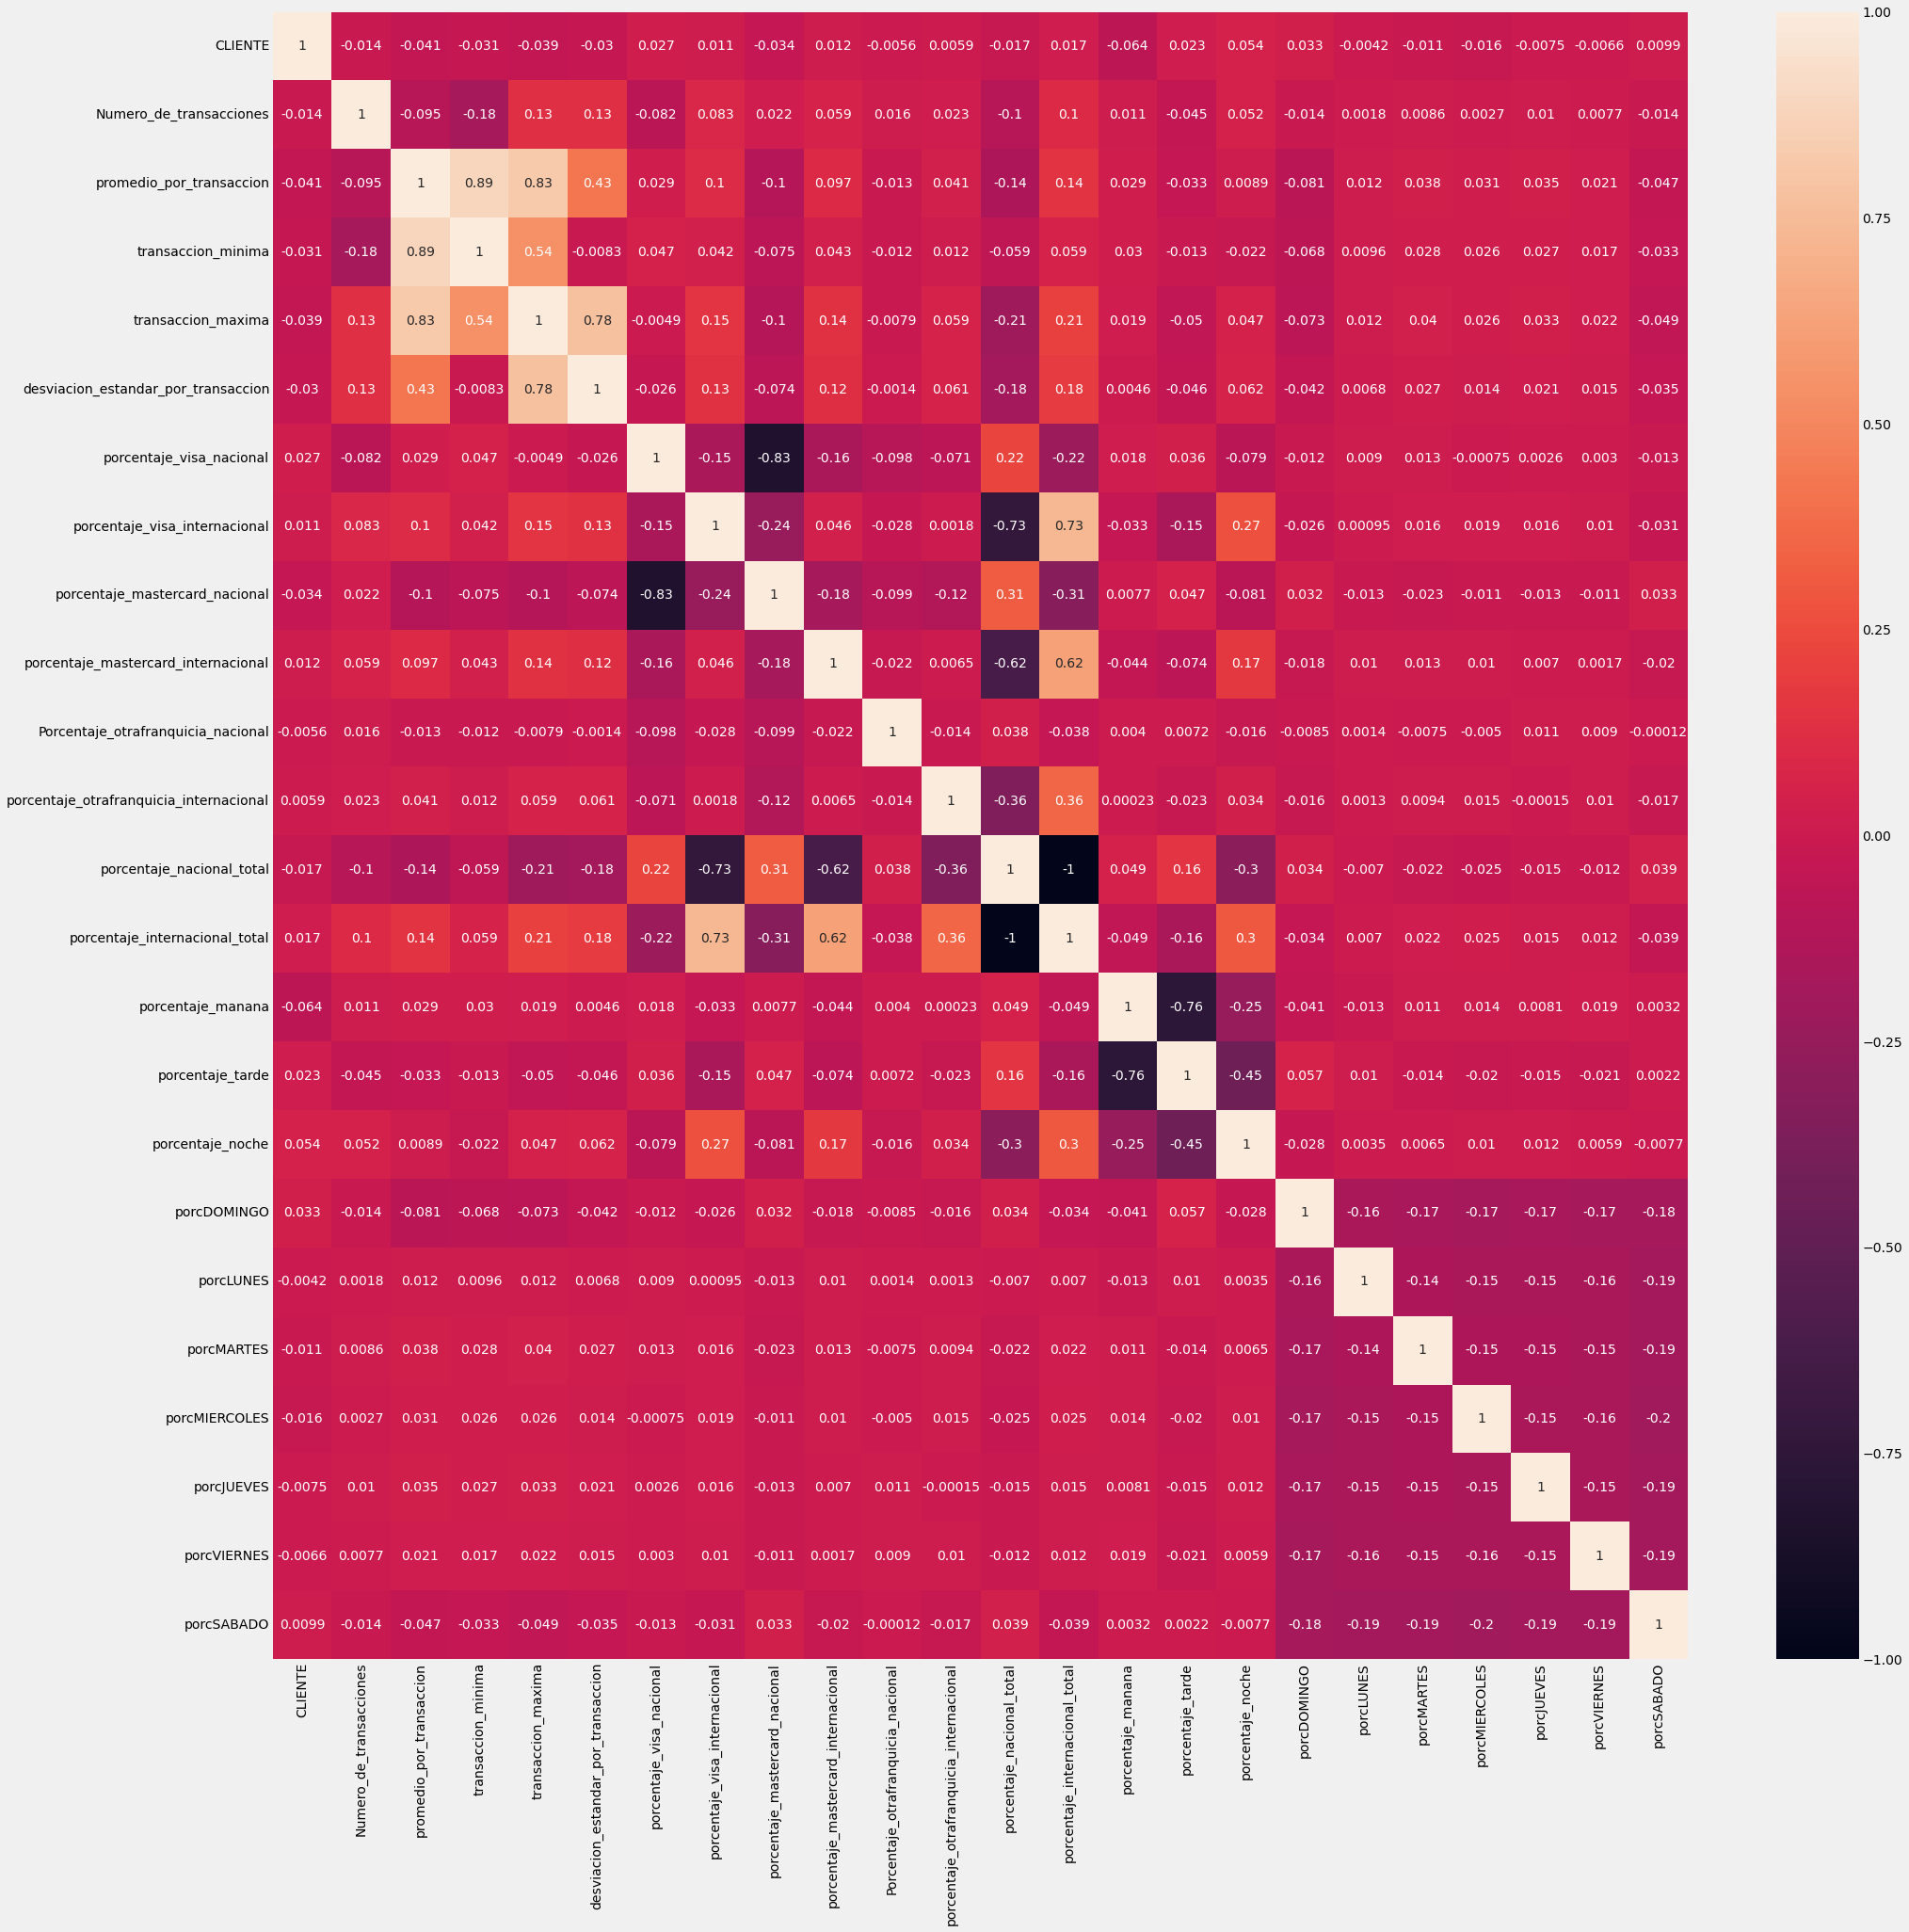

In [57]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot=True)

In [21]:
df.columns

Index(['CLIENTE', 'grupo_de_cliente', 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 'Sitio_consumo_masfrecuente',
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln'],
      dtype='object')

## First Version

In [26]:
cols_modelo_1 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO', 
       'porcentaje_visa_nacional_ln', 'Numero_de_transacciones_ln',
       'promedio_por_transaccion_ln', 'transaccion_minima_ln',
       'transaccion_maxima_ln', 'desviacion_estandar_por_transaccion_ln']

In [27]:
X = np.array(df[cols_modelo_1])

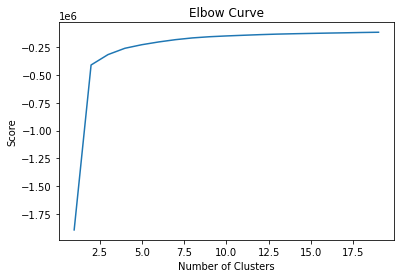

In [28]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
modelo_1 = KMeans(n_clusters=3).fit(X)
# Predicting the clusters
labels = modelo_1.predict(X)

In [36]:
centroids = modelo_1.cluster_centers_
print(centroids)

[[3.49820063e-01 2.91552827e-02 5.78916625e-01 1.97047957e-02
  1.59572258e-02 6.44600816e-03 9.44693913e-01 5.53060865e-02
  2.87054858e-01 5.81301990e-01 1.31643152e-01 1.52561724e-01
  1.31863650e-01 1.28455478e-01 1.32431458e-01 1.26672868e-01
  1.39440296e-01 1.88574527e-01 1.82985889e+00 1.82985889e+00
  1.12996642e+01 1.01579197e+01 1.18766394e+01 1.05047710e+01]
 [4.16657094e-01 2.23434808e-02 5.27958070e-01 1.62837450e-02
  1.16456060e-02 5.11200460e-03 9.56260770e-01 4.37392303e-02
  2.84496868e-01 6.07608244e-01 1.07894888e-01 1.42304231e-01
  1.30404442e-01 1.28768068e-01 1.41197295e-01 1.35366766e-01
  1.41234494e-01 1.80724704e-01 7.13464387e-01 7.13464387e-01
  1.22061041e+01 1.22061015e+01 1.22061064e+01 8.77517588e-03]
 [3.52477560e-01 6.39351129e-02 5.04025887e-01 4.84646629e-02
  1.41631049e-02 1.69336718e-02 8.70666552e-01 1.29333448e-01
  2.93899070e-01 5.55959815e-01 1.50141115e-01 1.18763074e-01
  1.33283819e-01 1.43295562e-01 1.46134525e-01 1.49380739e-01
  1.44

In [37]:
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_1).T

In [38]:
centroids_df

,0,1,2
porcentaje_visa_nacional,0.349820,0.416657,0.352478
porcentaje_visa_internacional,0.029155,0.022343,0.063935
porcentaje_mastercard_nacional,0.578917,0.527958,0.504026
porcentaje_mastercard_internacional,0.019705,0.016284,0.048465
Porcentaje_otrafranquicia_nacional,0.015957,0.011646,0.014163
porcentaje_otrafranquicia_internacional,0.006446,0.005112,0.016934
porcentaje_nacional_total,0.944694,0.956261,0.870667
porcentaje_internacional_total,0.055306,0.043739,0.129333
porcentaje_manana,0.287055,0.284497,0.293899
porcentaje_tarde,0.581302,0.607608,0.555960


## Second Version

In [87]:
cols_modelo_2 = [ 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [88]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

### Silhouette score

In [89]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_2])
    score = silhouette_score(df[cols_modelo_2], kmeans.labels_)
    silhouette_coefficients.append(score)

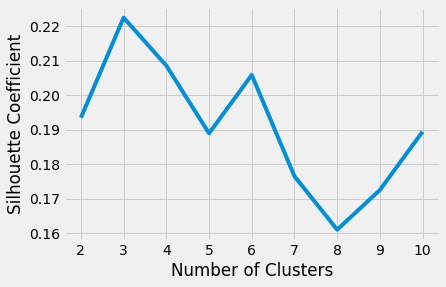

In [90]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
modelo_2 = KMeans(n_clusters=2).fit(X)

## Third Version

In [52]:
cols_modelo_3 = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [53]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[cols_modelo_3])
    score = silhouette_score(df[cols_modelo_3], kmeans.labels_)
    silhouette_coefficients.append(score)

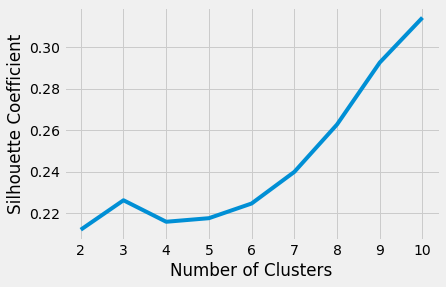

In [54]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fourth Version

In [91]:
cols_modelo_4 = ['Numero_de_transacciones',
       'promedio_por_transaccion','porcentaje_manana',
        'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']

In [92]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_4])

In [93]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [94]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

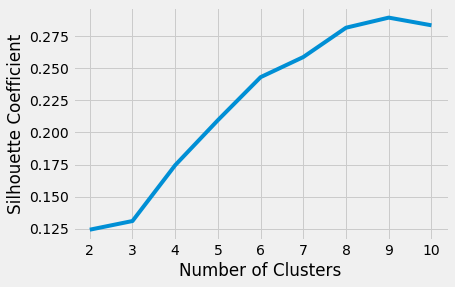

In [95]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Fifth Version

In [42]:
df['lunes_dinero'] = df['promedio_por_transaccion']*df['porcLUNES']*df['Numero_de_transacciones']
df['martes_dinero'] = df['promedio_por_transaccion']*df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_dinero'] = df['promedio_por_transaccion']*df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_dinero'] = df['promedio_por_transaccion']*df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_dinero'] = df['promedio_por_transaccion']*df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_dinero'] = df['promedio_por_transaccion']*df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_dinero'] = df['promedio_por_transaccion']*df['porcDOMINGO']*df['Numero_de_transacciones']

df['lunes_ocasiones'] = df['porcLUNES']*df['Numero_de_transacciones']
df['martes_ocasiones'] = df['porcMARTES']*df['Numero_de_transacciones']
df['miercoles_ocasiones'] = df['porcMIERCOLES']*df['Numero_de_transacciones']
df['jueves_ocasiones'] = df['porcJUEVES']*df['Numero_de_transacciones']
df['viernes_ocasiones'] = df['porcVIERNES']*df['Numero_de_transacciones']
df['sabado_ocasiones'] = df['porcSABADO']*df['Numero_de_transacciones']
df['domingo_ocasiones'] = df['porcDOMINGO']*df['Numero_de_transacciones']

In [7]:
hist_col=[ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima', 'lunes_dinero',
       'martes_dinero', 'miercoles_dinero', 'jueves_dinero', 'viernes_dinero',
       'sabado_dinero', 'domingo_dinero', 'lunes_ocasiones',
       'martes_ocasiones', 'miercoles_ocasiones', 'jueves_ocasiones',
       'viernes_ocasiones', 'sabado_ocasiones', 'domingo_ocasiones']
       

array([[<AxesSubplot:title={'center':'Numero_de_transacciones'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion'}>,
        <AxesSubplot:title={'center':'transaccion_minima'}>,
        <AxesSubplot:title={'center':'transaccion_maxima'}>],
       [<AxesSubplot:title={'center':'lunes_dinero'}>,
        <AxesSubplot:title={'center':'martes_dinero'}>,
        <AxesSubplot:title={'center':'miercoles_dinero'}>,
        <AxesSubplot:title={'center':'jueves_dinero'}>],
       [<AxesSubplot:title={'center':'viernes_dinero'}>,
        <AxesSubplot:title={'center':'sabado_dinero'}>,
        <AxesSubplot:title={'center':'domingo_dinero'}>,
        <AxesSubplot:title={'center':'lunes_ocasiones'}>],
       [<AxesSubplot:title={'center':'martes_ocasiones'}>,
        <AxesSubplot:title={'center':'miercoles_ocasiones'}>,
        <AxesSubplot:title={'center':'jueves_ocasiones'}>,
        <AxesSubplot:title={'center':'viernes_ocasiones'}>],
       [<AxesSubplot:title={'center':'sabado_oc

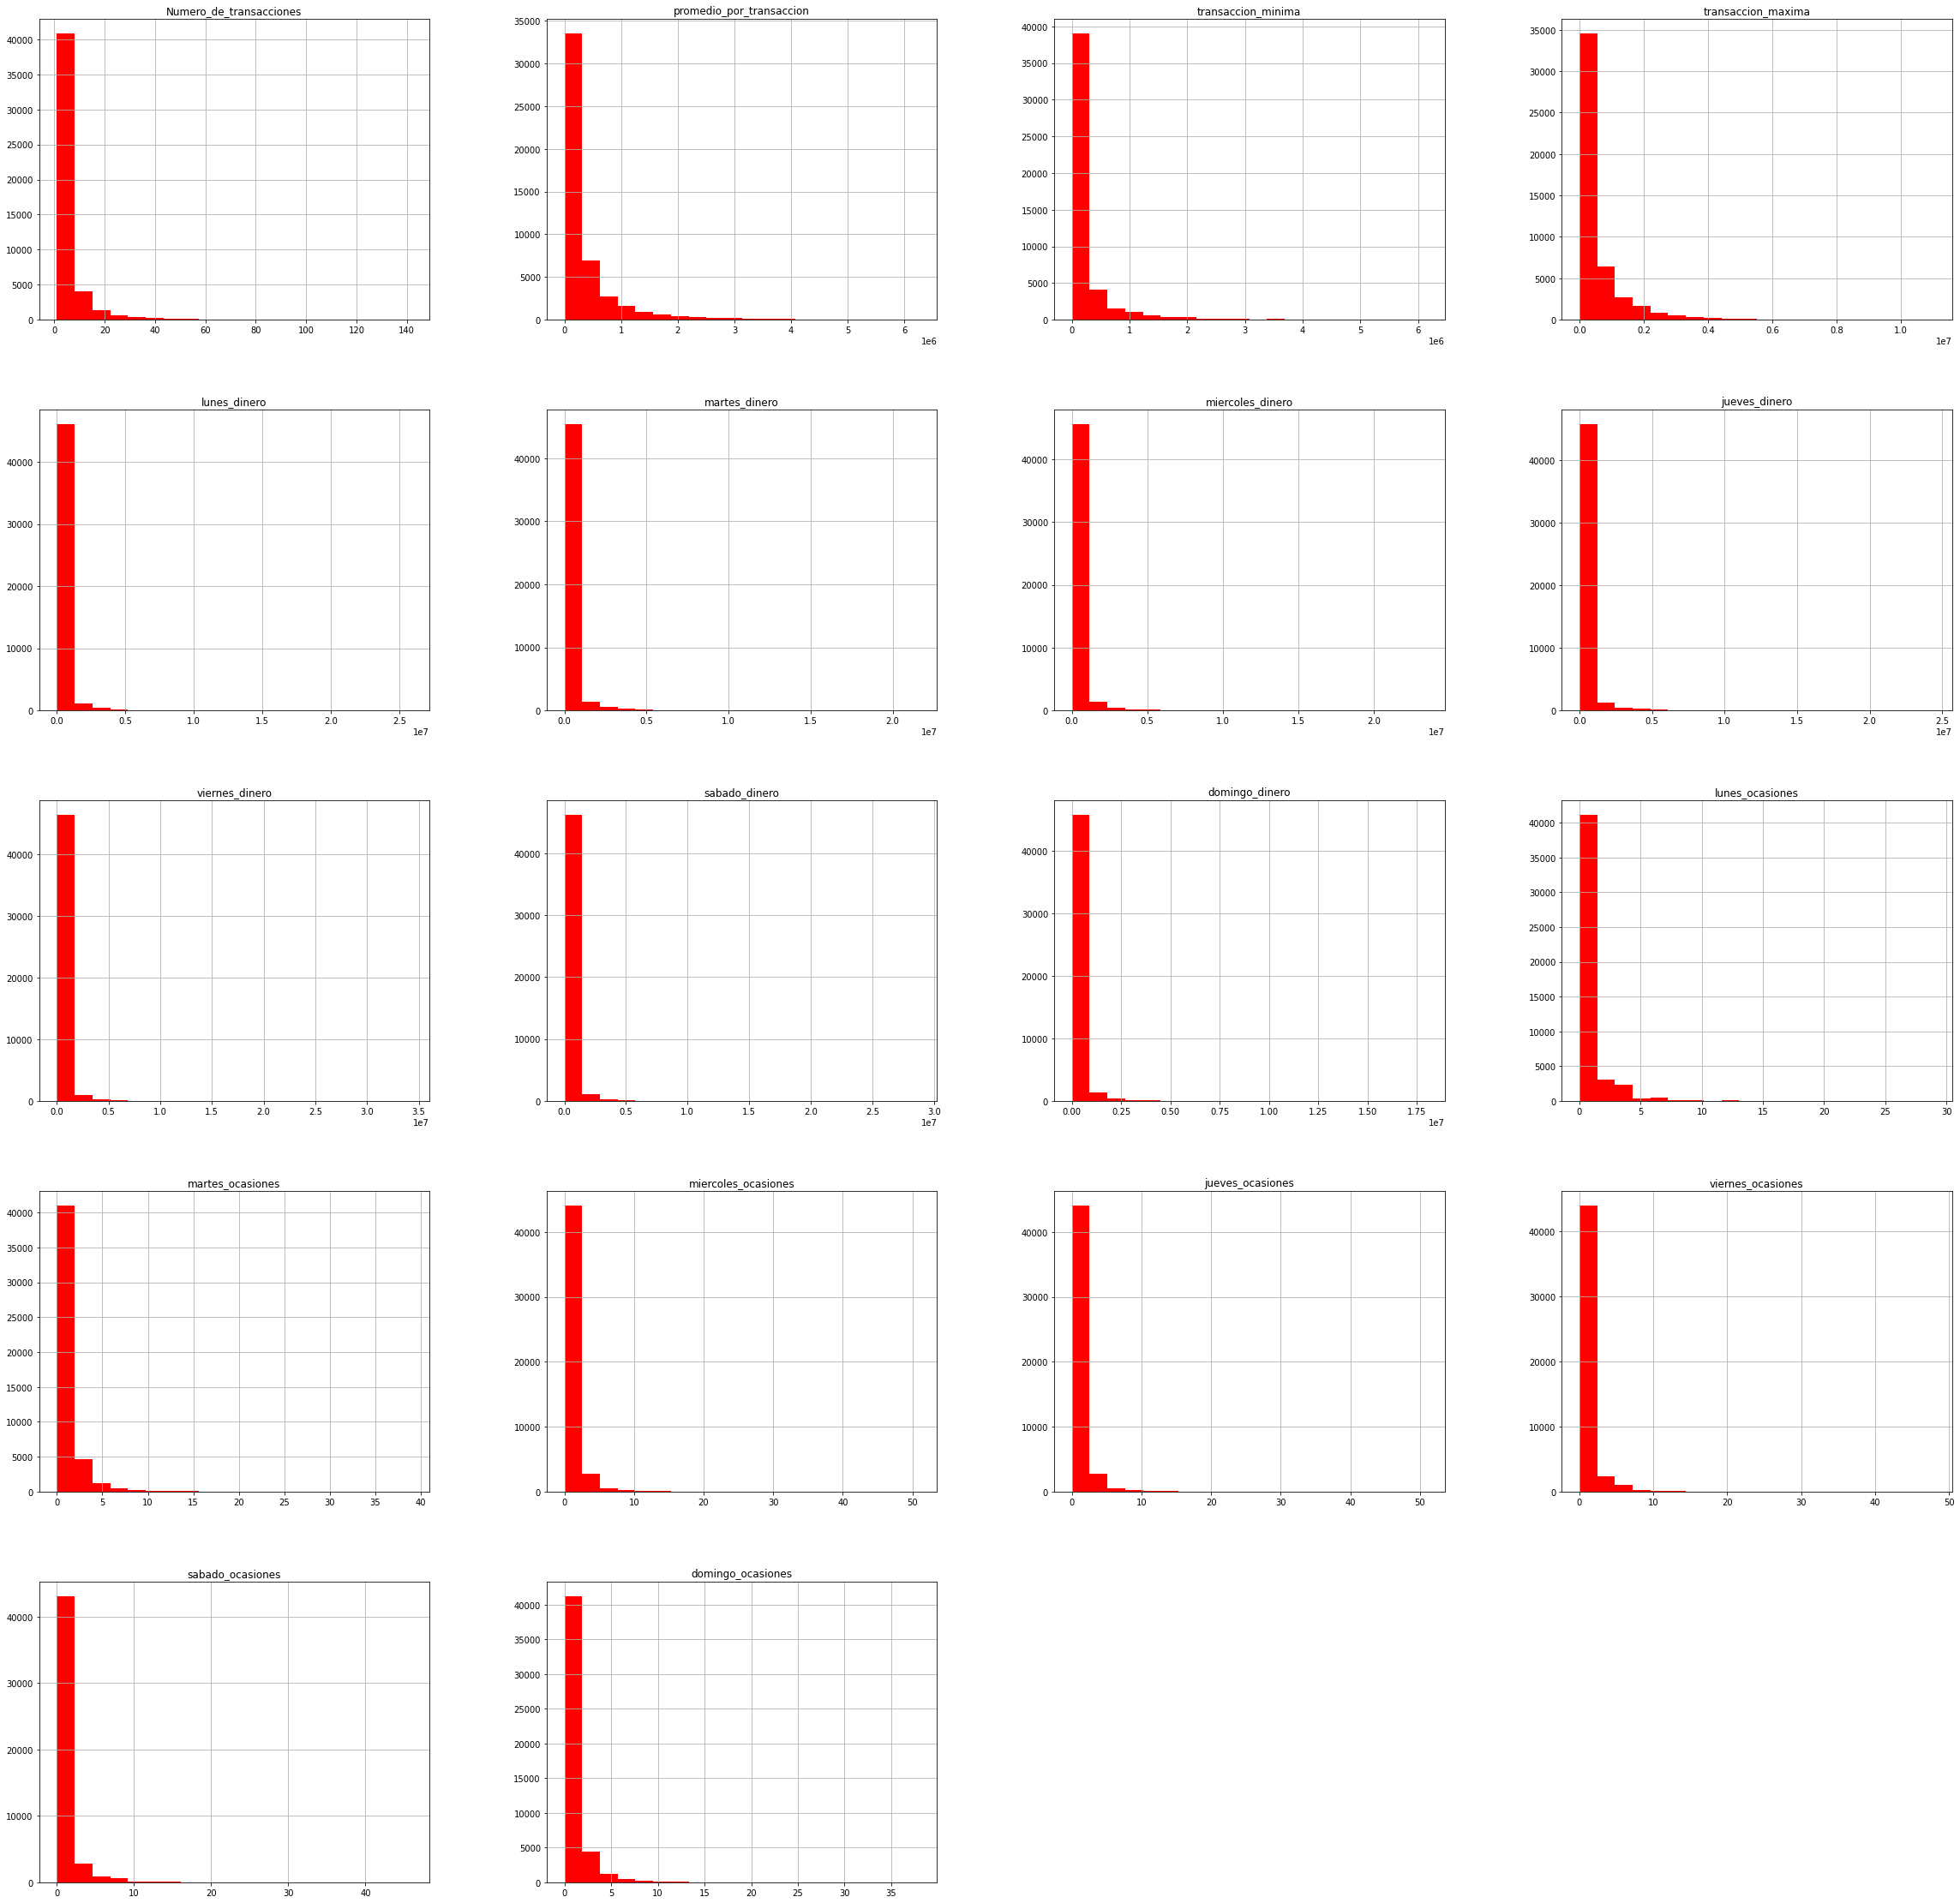

In [8]:
df[hist_col].hist(bins = 20, figsize=(40,40), color = 'r')

### LN transformation 

In [43]:
df['Numero_de_transacciones_ln'] = np.log1p(df['Numero_de_transacciones'])
df['promedio_por_transaccion_ln'] = np.log1p(df['promedio_por_transaccion'])
df['transaccion_minima_ln'] = np.log1p(df['transaccion_minima'])
df['transaccion_maxima_ln'] = np.log1p(df['transaccion_maxima'])

df['lunes_dinero_ln'] =  np.log1p(df['lunes_dinero'])
df['martes_dinero_ln'] =  np.log1p(df['martes_dinero'])
df['miercoles_dinero_ln'] =  np.log1p(df['miercoles_dinero'])
df['jueves_dinero_ln'] =  np.log1p(df['jueves_dinero'])
df['viernes_dinero_ln'] =  np.log1p(df['viernes_dinero'])
df['sabado_dinero_ln'] =  np.log1p(df['sabado_dinero'])
df['domingo_dinero_ln'] =  np.log1p(df['domingo_dinero'])

df['lunes_ocasiones_ln'] =  np.log1p(df['lunes_ocasiones'])
df['martes_ocasiones_ln'] =  np.log1p(df['martes_ocasiones'])
df['miercoles_ocasiones_ln'] =  np.log1p(df['miercoles_ocasiones'])
df['jueves_ocasiones_ln'] =  np.log1p(df['jueves_ocasiones'])
df['viernes_ocasiones_ln'] =  np.log1p(df['viernes_ocasiones'])
df['sabado_ocasiones_ln'] =  np.log1p(df['sabado_ocasiones'])
df['domingo_ocasiones_ln'] =  np.log1p(df['domingo_ocasiones'])

In [14]:
hist_cols_ln=[ 'Numero_de_transacciones_ln', 'promedio_por_transaccion_ln',
       'transaccion_minima_ln', 'transaccion_maxima_ln',
       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln',
       'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln',
       'domingo_dinero_ln', 'lunes_ocasiones_ln', 'martes_ocasiones_ln',
       'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln',
       'sabado_ocasiones_ln', 'domingo_ocasiones_ln']

array([[<AxesSubplot:title={'center':'Numero_de_transacciones_ln'}>,
        <AxesSubplot:title={'center':'promedio_por_transaccion_ln'}>,
        <AxesSubplot:title={'center':'transaccion_minima_ln'}>,
        <AxesSubplot:title={'center':'transaccion_maxima_ln'}>],
       [<AxesSubplot:title={'center':'lunes_dinero_ln'}>,
        <AxesSubplot:title={'center':'martes_dinero_ln'}>,
        <AxesSubplot:title={'center':'miercoles_dinero_ln'}>,
        <AxesSubplot:title={'center':'jueves_dinero_ln'}>],
       [<AxesSubplot:title={'center':'viernes_dinero_ln'}>,
        <AxesSubplot:title={'center':'sabado_dinero_ln'}>,
        <AxesSubplot:title={'center':'domingo_dinero_ln'}>,
        <AxesSubplot:title={'center':'lunes_ocasiones_ln'}>],
       [<AxesSubplot:title={'center':'martes_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'miercoles_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'jueves_ocasiones_ln'}>,
        <AxesSubplot:title={'center':'viernes_ocasiones_ln'}>],

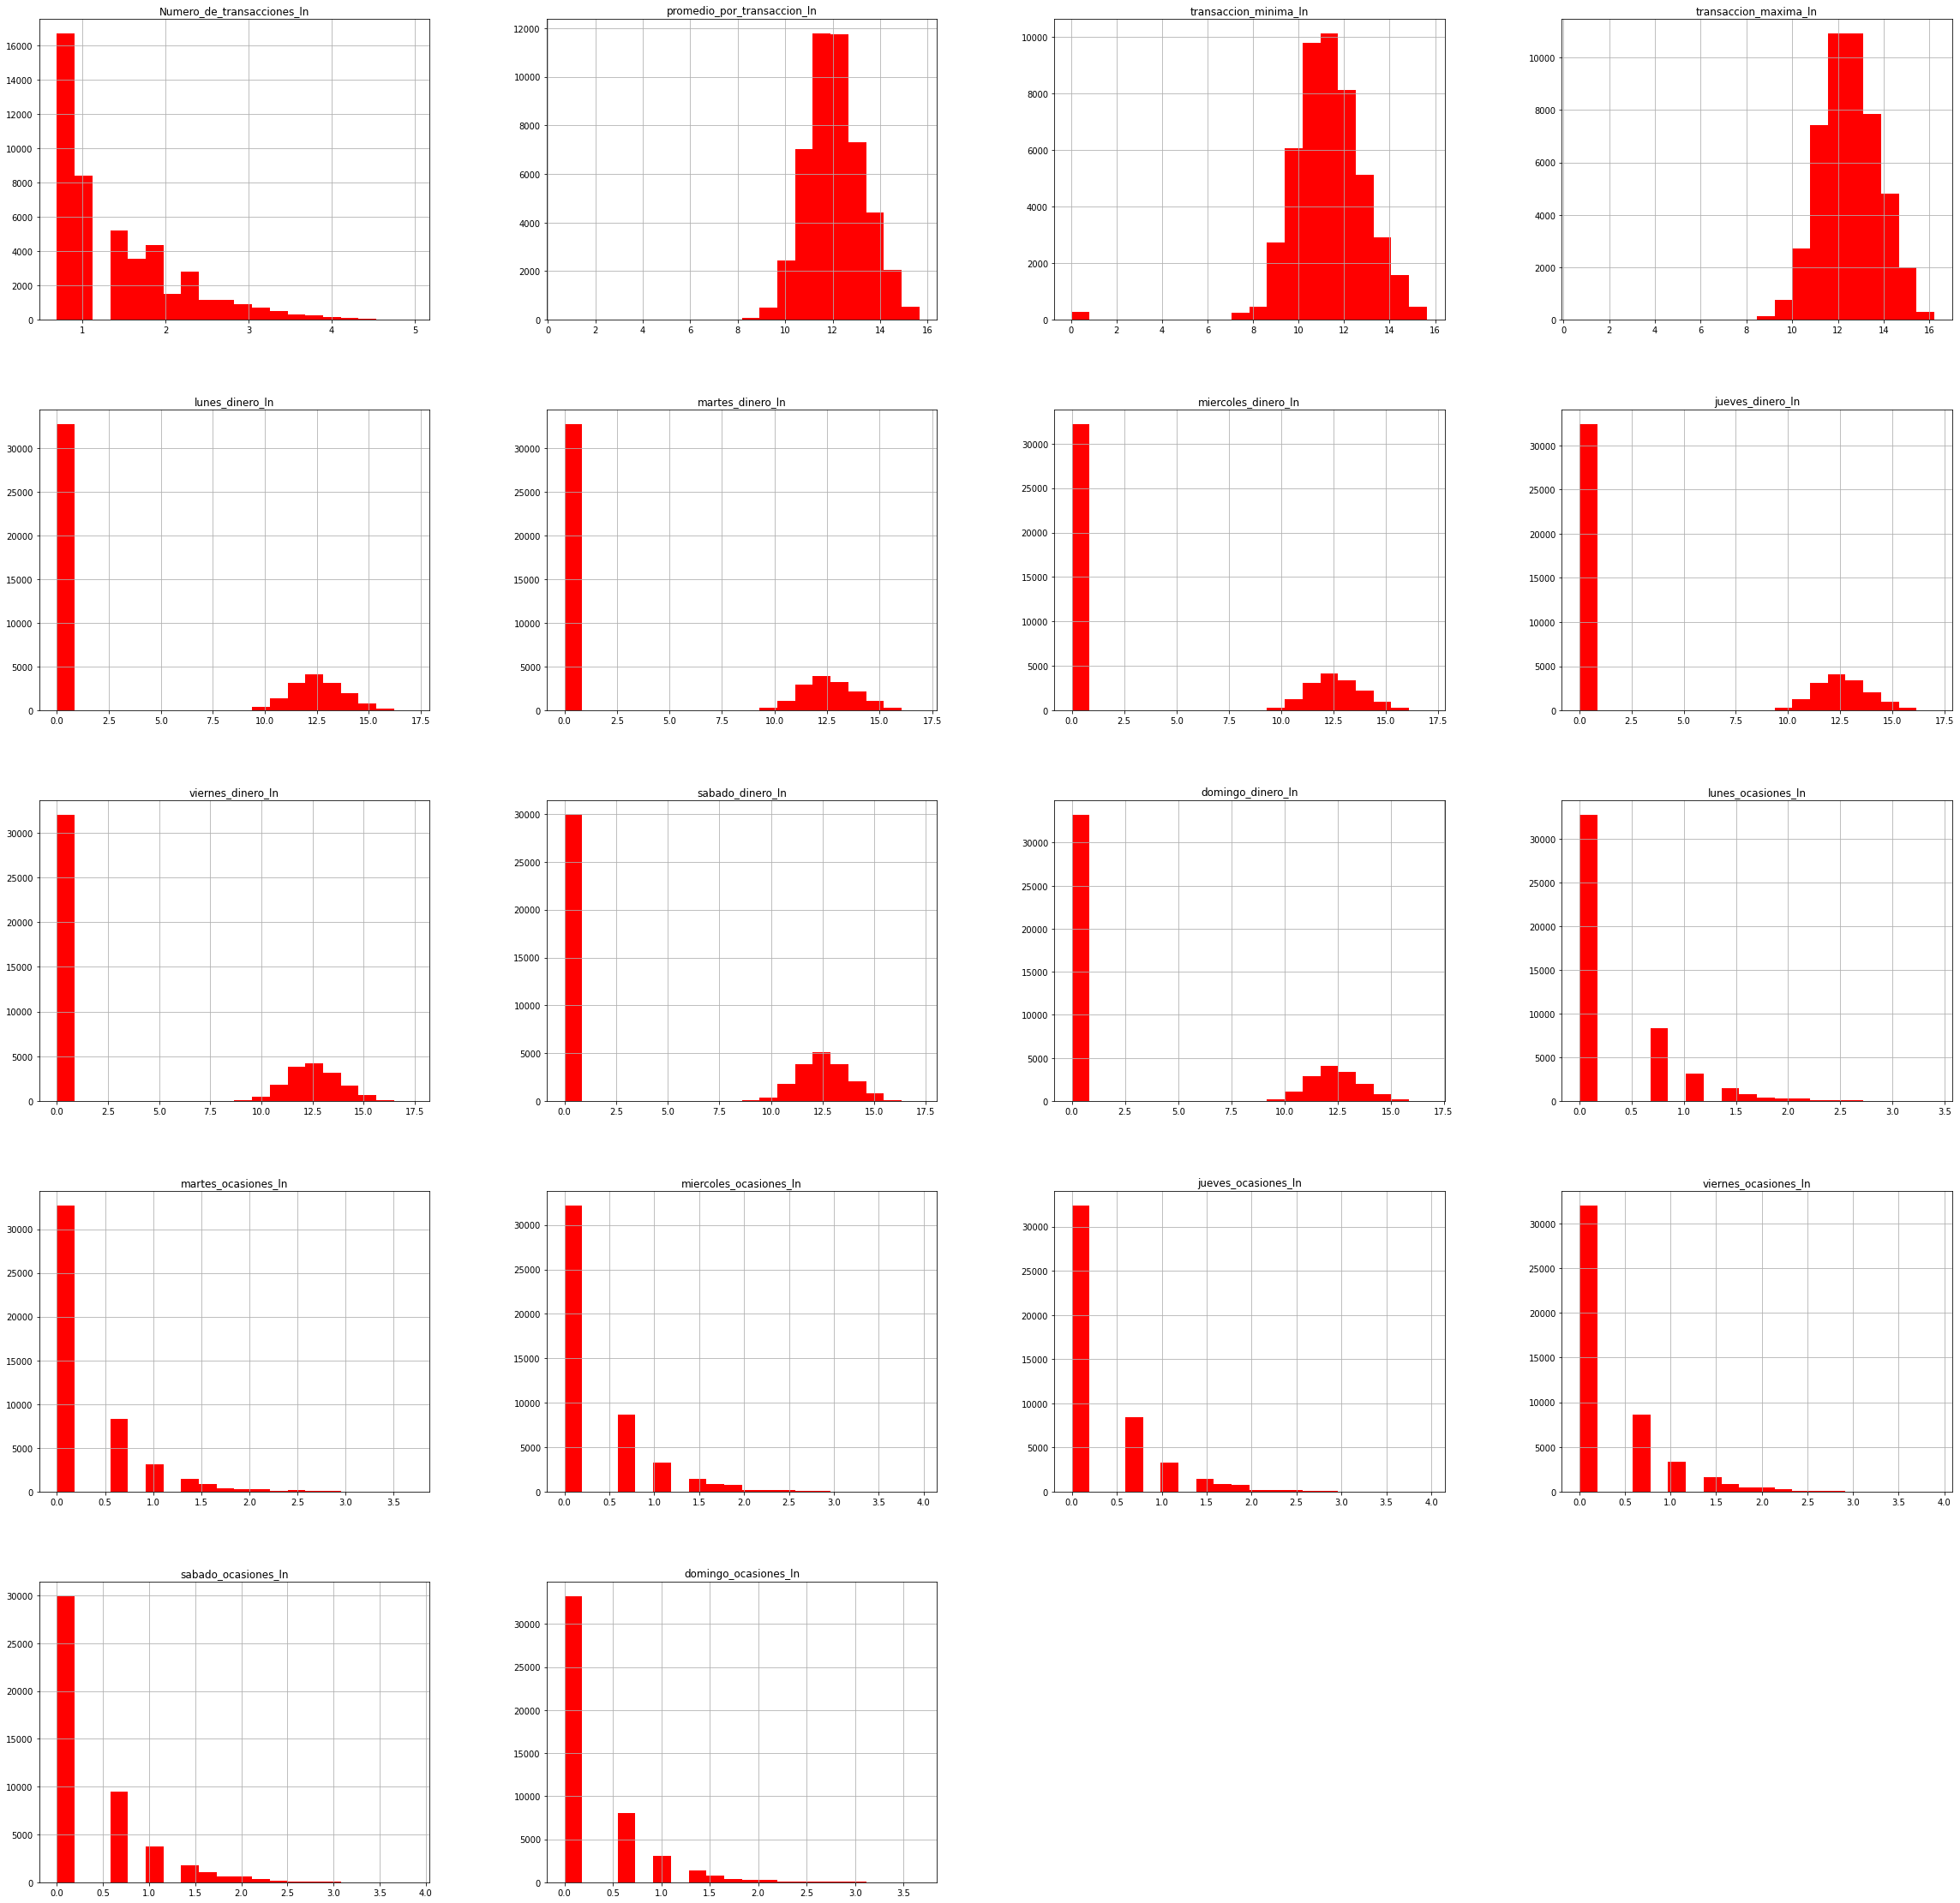

In [15]:
df[hist_cols_ln].hist(bins = 20, figsize=(40,40), color = 'r')

### Correlation 

In [40]:
df.columns

Index(['clusterCount', 'gap'], dtype='object')

In [56]:
## La columna promedio_transacciones y numero de transacciones fueron 
#  retiradas pues estan altamente correlacionada con las variabels de ocasiones y dinero
#  respectivamente.

## Las columnas seleccionadas para el modelo no utilizan transformaciones LN pues, 
# esto presento malos resultados en la prueba de silhouette score.

cols_modelo_5 = [  'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones',
       'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones',
       'domingo_ocasiones',
       'transaccion_minima', 'transaccion_maxima',       
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero',
       'viernes_dinero', 'sabado_dinero', 'domingo_dinero']

#cols_modelo_5 = [ 'Numero_de_transacciones_ln', 
#       'transaccion_minima_ln', 'transaccion_maxima_ln',
#       'lunes_dinero_ln', 'martes_dinero_ln', 'miercoles_dinero_ln',
#       'jueves_dinero_ln', 'viernes_dinero_ln', 'sabado_dinero_ln',
#       'domingo_dinero_ln', 'lunes_ocasiones_ln', 'martes_ocasiones_ln',
#       'miercoles_ocasiones_ln', 'jueves_ocasiones_ln', 'viernes_ocasiones_ln',
#       'sabado_ocasiones_ln', 'domingo_ocasiones_ln']
       

In [57]:
corr_df=df[cols_modelo_5].corr(method='pearson')

<AxesSubplot:>

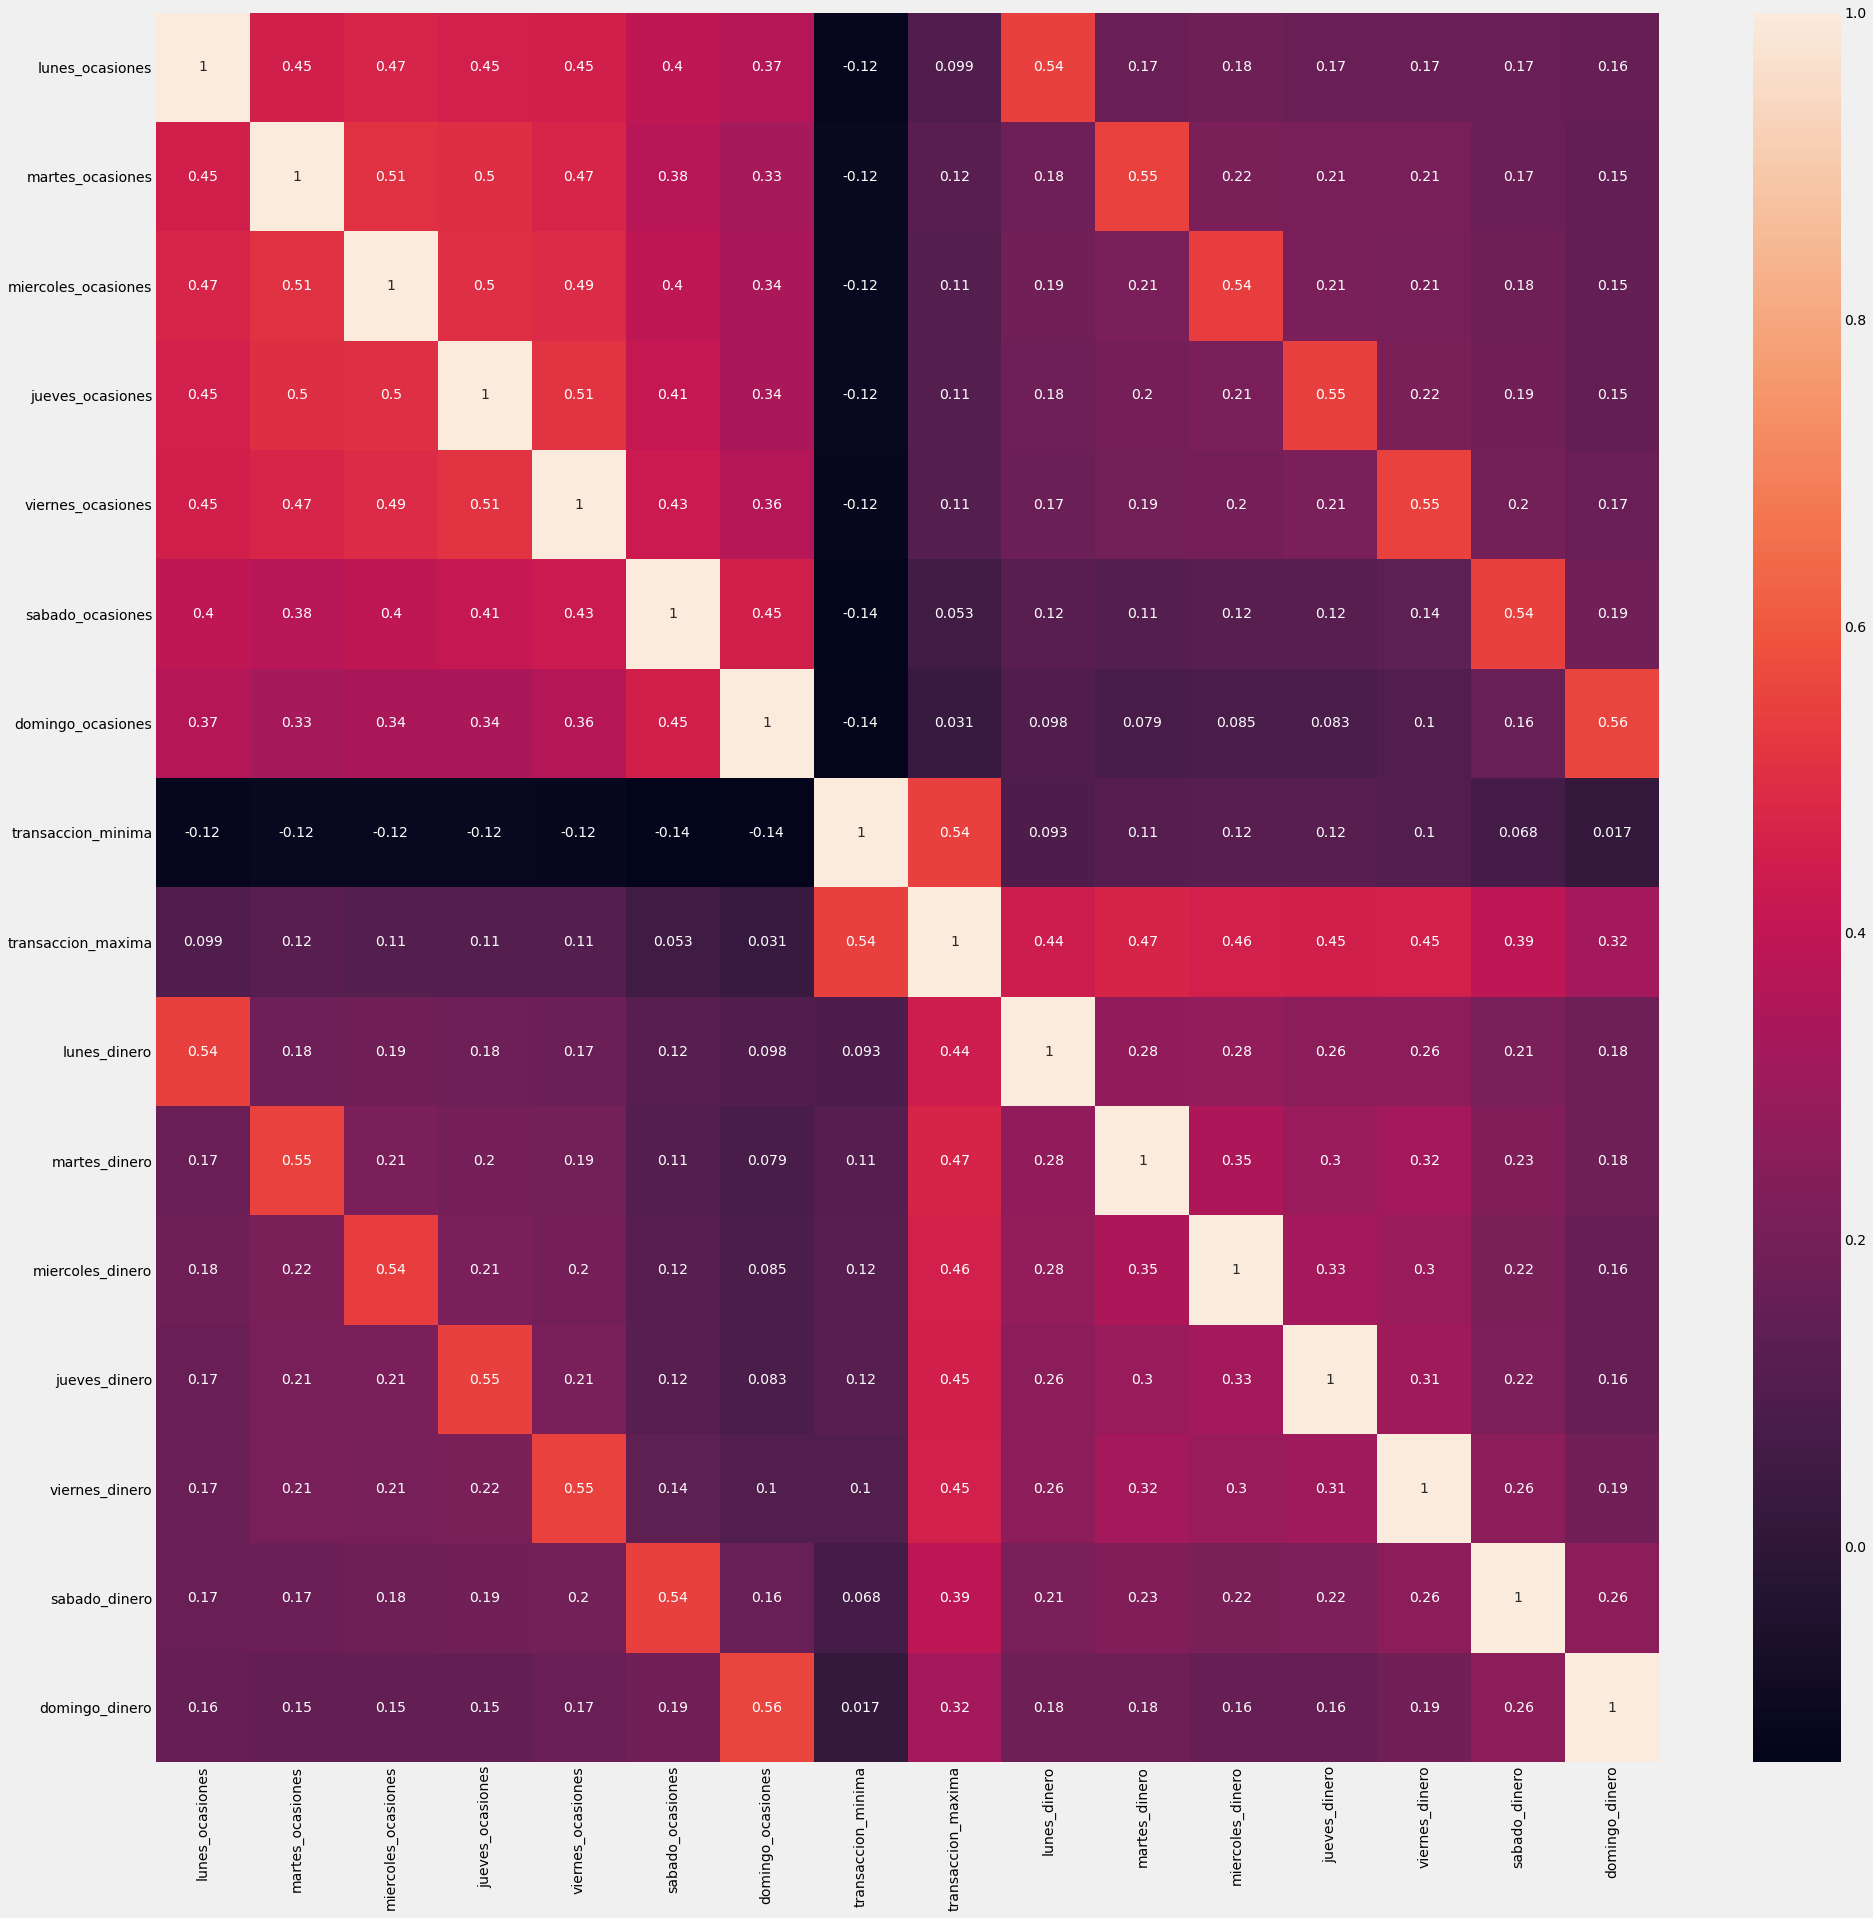

In [58]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_df, annot=True)

In [31]:
df.sort_values(['promedio_por_transaccion'], ascending=False).head(100)

,CLIENTE,grupo_de_cliente,Numero_de_transacciones,promedio_por_transaccion,transaccion_minima,transaccion_maxima,desviacion_estandar_por_transaccion,porcentaje_visa_nacional,porcentaje_visa_internacional,porcentaje_mastercard_nacional,...,sabado_dinero,domingo_dinero,lunes_ocasiones,martes_ocasiones,miercoles_ocasiones,jueves_ocasiones,viernes_ocasiones,sabado_ocasiones,domingo_ocasiones,cluster_5
43142,43143,A,4,6262025.0,548100.0,9000000.0,3859990.8,0.000000,0.0,1.000000,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1
19713,19714,A,1,6148920.0,6148920.0,6148920.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
23947,23948,A,1,5966212.0,5966212.0,5966212.0,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
16551,16552,A,1,5961903.0,5961903.0,5961903.0,0.0,0.000000,0.0,1.000000,...,5961903.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4144,4145,A,2,5845495.0,4673690.0,7017300.0,1657182.5,0.500000,0.0,0.500000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8376,8377,A,2,4600520.0,4600520.0,4600520.0,0.0,0.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1
19067,19068,A,1,4600000.0,4600000.0,4600000.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
16349,16350,A,1,4600000.0,4600000.0,4600000.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
43362,43363,A,1,4597554.0,4597554.0,4597554.0,0.0,0.000000,0.0,1.000000,...,4597554.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


### Promedio por transaccion VS numero de transacciones

<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

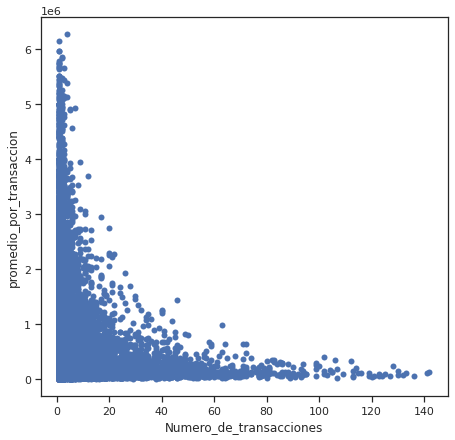

In [34]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                #hue="Numero_de_transacciones",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df, ax=ax)

### Clustering

In [59]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df[cols_modelo_5])

In [60]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

#### Gap Statistics

In [31]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)


Text(0.5, 1.0, 'Gap Statistic vs. K')

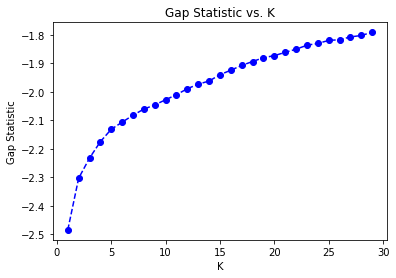

In [30]:
score_g, df_n = optimalK(scaled_features, nrefs=1, maxClusters=30)
plt.plot(df_n['clusterCount'], df_n['gap'], linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic vs. K')

In [29]:
df_n

,clusterCount,gap
0,1.0,-2.486942
1,2.0,-2.304288
2,3.0,-2.233011
3,4.0,-2.173200
4,5.0,-2.130358
5,6.0,-2.105928
6,7.0,-2.082370
7,8.0,-2.059327
8,9.0,-2.042726
9,10.0,-2.027574


#### WSS Score

In [63]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [65]:
wss_scores = calculate_WSS(scaled_features, 11)

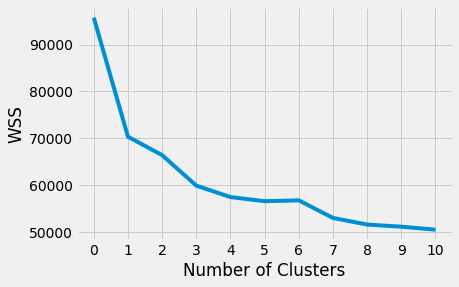

In [67]:
plt.style.use("fivethirtyeight")
plt.plot(range( 11), wss_scores)
plt.xticks(range( 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.show()

#### Silhouette Score

In [61]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

##### Silhoutte score with no variable transformations

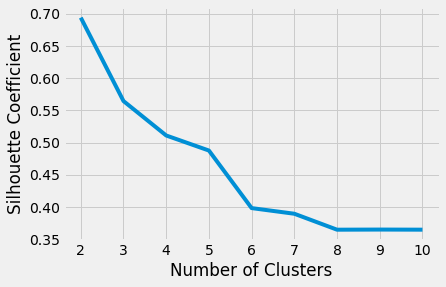

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

##### Silhouette Score with ln variable transformations

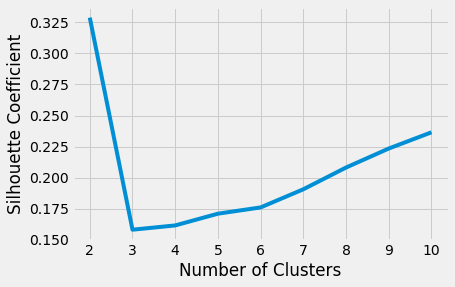

In [48]:
## Las variables transformadas con ln empeoran los resultados 
# en la agrupacion de clusters, por lo cual se descartan
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Trainning

In [37]:
modelo_5 = KMeans(n_clusters=5).fit(scaled_features)

In [31]:
labels = modelo_5.predict(scaled_features)
df['cluster_5'] = labels

In [32]:
df.groupby('cluster_5')['CLIENTE'].count()

cluster_5
0    38059
1      541
2     3677
3     5014
4      580
Name: CLIENTE, dtype: int64

In [33]:
centroids = modelo_5.cluster_centers_
centroids_df = pd.DataFrame(centroids,columns=cols_modelo_5).T
centroids_df

,0,1,2,3,4
Numero_de_transacciones,-0.267174,6.512178,-0.311594,1.370584,1.581527
lunes_ocasiones,-0.198693,4.520077,-0.207565,1.031059,1.222350
martes_ocasiones,-0.199044,4.798953,-0.160506,0.947510,1.409325
miercoles_ocasiones,-0.198671,4.805354,-0.197365,0.971253,1.407271
jueves_ocasiones,-0.192208,4.961400,-0.181549,0.891527,1.426713
viernes_ocasiones,-0.200699,4.904746,-0.189075,0.978967,1.328338
sabado_ocasiones,-0.184379,4.457791,-0.295108,1.051595,0.718577
domingo_ocasiones,-0.163499,4.120839,-0.316729,0.976200,0.451799
transaccion_minima,-0.174782,-0.461026,2.436227,-0.409700,-0.003601
transaccion_maxima,-0.292220,0.288305,2.090656,0.173200,4.154111


<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

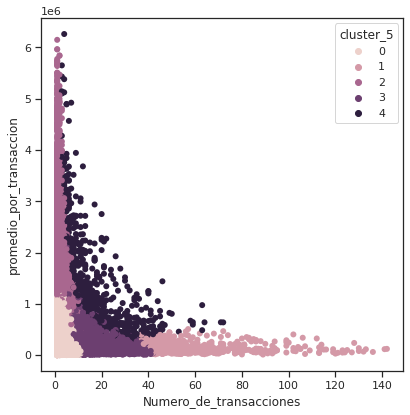

In [34]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                hue="cluster_5",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df, ax=ax)

In [33]:
pd.set_option('max_rows', None)
pd.crosstab(df['Sitio_consumo_masfrecuente'], df['cluster_5'])

KeyError: 'Sitio_consumo_masfrecuente'

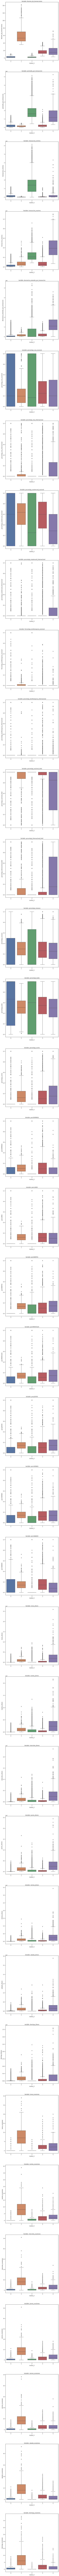

In [36]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 'Numero_de_transacciones',
       'promedio_por_transaccion', 'transaccion_minima', 'transaccion_maxima',
       'desviacion_estandar_por_transaccion', 'porcentaje_visa_nacional',
       'porcentaje_visa_internacional', 'porcentaje_mastercard_nacional',
       'porcentaje_mastercard_internacional',
       'Porcentaje_otrafranquicia_nacional',
       'porcentaje_otrafranquicia_internacional', 'porcentaje_nacional_total',
       'porcentaje_internacional_total', 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO',
       'lunes_dinero', 'martes_dinero', 'miercoles_dinero', 'jueves_dinero',
       'viernes_dinero', 'sabado_dinero', 'domingo_dinero',  'lunes_ocasiones', 'martes_ocasiones', 'miercoles_ocasiones',
       'jueves_ocasiones', 'viernes_ocasiones', 'sabado_ocasiones',
       'domingo_ocasiones']
cluster = 'cluster_5'

rows_sz= len(graph_columns)
columns_sz=1
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(10,500))

for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column))

#### Subclustering

In [17]:
df_dense = df[df['cluster_5'] == 0]

In [18]:
scaler =StandardScaler()
scaled_features = scaler.fit_transform(df_dense[cols_modelo_5])

In [19]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [50]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

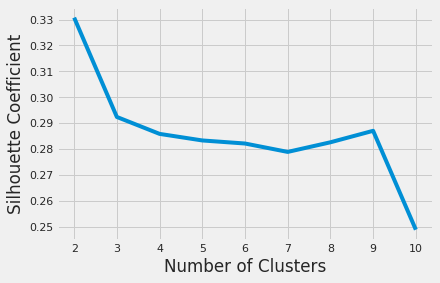

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
modelo_5_1 = KMeans(n_clusters=2).fit(scaled_features)

In [21]:
labels = modelo_5_1.predict(scaled_features)
df_dense['cluster_5_1'] = labels

/tmp/ipykernel_6088/481415363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dense['cluster_5_1'] = labels


<AxesSubplot:xlabel='Numero_de_transacciones', ylabel='promedio_por_transaccion'>

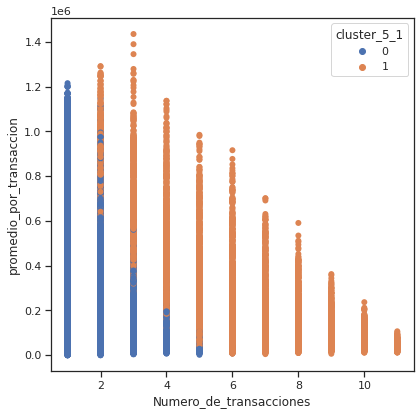

In [22]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='Numero_de_transacciones', y="promedio_por_transaccion",
                hue="cluster_5_1",
                #palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                #sizes=(1, 8), 
                linewidth=0,
                data=df_dense[df_dense['cluster_5'] == 0], ax=ax)

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="ticks")

graph_columns = [ 'porcentaje_manana',
       'porcentaje_tarde', 'porcentaje_noche', 'porcDOMINGO', 'porcLUNES',
       'porcMARTES', 'porcMIERCOLES', 'porcJUEVES', 'porcVIERNES',
       'porcSABADO']
cluster = 'cluster_5'

rows_sz= 1
columns_sz=len(graph_columns)
fig, axes = plt.subplots(rows_sz,columns_sz,figsize=(500,100))

for idx,column in enumerate(graph_columns):

    sns.boxplot( ax=axes[idx],
    data=df,
    x=cluster, y=column)
    #id=idx
    #print(idx)
    axes[idx].set_title('Variable: {}'.format(column))

Error in callback <function flush_figures at 0x7f7b3d279160> (for post_execute):


KeyboardInterrupt: 